<a href="https://colab.research.google.com/github/mixagur/MYgeekbrains/blob/main/Work_metadoor_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import re
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#url = 'https://raw.github.com/metadoor-dev/ds_project/blob/58b150fb0e40349b3809cc3a65937aaf3c892583/data_description.xlsx'
#url = 'https://raw.github.com/metadoor-dev/ds_project/blob/main/data_description.xlsx'
#df = pd.read_excel(url)# Dataset is now stored in a Pandas Dataframe
#df.head(50)
#df = pd.read_excel('/Users/a14451360/Desktop/data_description.xlsx')
#df.head(50)

In [ ]:
!git clone 'https://github.com/metadoor-dev/ds_project.git'

Cloning into 'ds_project'...
fatal: could not read Username for 'https://github.com': No such device or address


Загрузка данных по атрибутивному составу датасета - 124 атрибута


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_description.xlsx to data_description (1).xlsx
User uploaded file "data_description.xlsx" with length 13625 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data_description = pd.read_excel('data_description.xlsx')# Dataset is now stored in a Pandas Dataframe
df_data_description.head(150)

,Название поля,Описание
0,id_contract,Идентификатор контракта
1,id_client,Идентификатор клиента
2,SIGN_DATE,Дата подписания контракта
3,IP_flag,Флаг ИП
4,TARGET,Целевая переменная - факт наличия предъявления...
...,...,...
119,COUNT_CHANGE_EVER,Количество изменений в наименовании и организа...
120,BIRTHDATE,Дата рождения
121,AGE,Возраст
122,SEX_NAME,Пол


Загрузка тренировочных данных - 124 атрибута


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_dataset_hackathon_mkb.csv to train_dataset_hackathon_mkb.csv
User uploaded file "train_dataset_hackathon_mkb.csv" with length 9253323 bytes


In [ ]:
df_train = pd.read_csv('train_dataset_hackathon_mkb.csv',sep=';',encoding ="cp1251")# Dataset is now stored in a Pandas Dataframe
df_train.head(150)

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,...,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,NaN,21224000.0,1.048287e+10,1.059010e+08,127510000.0,9.477348e+09,440671000.0,3.312980e+08,138000.0,1.960896e+09,1.000700e+07,-46634000.0,599497000.0,500000.0,1.028878e+09,340135000.0,NaN,340135000.0,NaN,9.480796e+09,2.499973e+09,6.907960e+09,NaN,NaN,1.178183e+10,1.178183e+10,2.370882e+09,5.294104e+10,5.057016e+10,631752000.0,...,0.0,0.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,NaN,NaN,2.161000e+07,2.378000e+06,NaN,1.764200e+07,1000000.0,5.530000e+05,37000.0,9.073600e+07,1.000000e+05,NaN,6780000.0,NaN,8.385600e+07,NaN,NaN,NaN,NaN,4.248000e+06,NaN,4.171000e+06,77000.0,NaN,9.498400e+07,9.498400e+07,9.315000e+06,5.218400e+07,4.286900e+07,2569000.0,...,1.0,1.0,36.00.2,6.0,2762852.0,1.0,794.0,3.0,21.0,5408695.0,39.0,882647.0,4.0,1.0,0.0,1.0,1.0,1174998.0,2.0,0.0,2.0,2.0,2738217.0,38.0,0.0,38.0,39.0,4209963.0,169.0,0.0,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,356828000.0,38078000.0,5.786965e+09,1.200100e+07,71000.0,1.232486e+09,78603000.0,4.459193e+09,4611000.0,2.685905e+09,1.516514e+09,NaN,NaN,65834000.0,1.103557e+09,627253000.0,NaN,689000.0,626564000.0,4.411295e+09,3.930000e+05,3.092581e+09,NaN,NaN,7.724453e+09,7.724453e+09,1.694054e+10,4.028466e+10,2.334412e+10,931118000.0,...,1.0,1.0,35.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6466,09JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Загрузка тестовых данных - 124 атрибута


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_dataset_hackathon_mkb.csv to test_dataset_hackathon_mkb.csv
User uploaded file "test_dataset_hackathon_mkb.csv" with length 3581209 bytes


In [ ]:
df_test = pd.read_csv('test_dataset_hackathon_mkb.csv',sep=';',encoding ="cp1251")# Dataset is now stored in a Pandas Dataframe
df_test.head(150)

,id_contract,id_client,SIGN_DATE,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,17892,3620,08APR2019:00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17893,4101,08APR2019:00:00:00,0,1906000.0,NaN,1906000.0,NaN,NaN,NaN,NaN,14838000.0,4392000.0,NaN,727000.0,NaN,9719000.0,NaN,15222000.0,150000.0,NaN,NaN,NaN,15072000.0,NaN,NaN,NaN,NaN,1522000.0,NaN,1522000.0,NaN,NaN,16744000.0,16744000.0,2998000.0,3.101510e+08,3.071530e+08,2998000.0,NaN,...,2.0,2.0,46.3,2.0,0.0,0.0,0.0,0.0,7.0,4726558.0,0.0,0.0,0.0,181.0,0.0,77.0,47.0,17883526.0,1182.0,14.0,589.0,533.0,169299901.0,1204.0,2.0,857.0,767.0,138194657.0,10240.0,69.0,7439.0,7100.0,1.187411e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17894,9589,08APR2019:00:00:00,0,147000.0,NaN,147000.0,NaN,NaN,NaN,NaN,95529000.0,29812000.0,7000.0,56538000.0,504000.0,8430000.0,238000.0,4145000.0,2538000.0,NaN,NaN,NaN,1607000.0,NaN,NaN,NaN,NaN,91531000.0,NaN,91531000.0,NaN,NaN,95676000.0,95676000.0,48975000.0,5.060230e+08,4.570480e+08,1753000.0,47222000.0,...,1.0,1.0,33.12,10.0,2272145.0,2.0,176875.0,0.0,103.0,27542049.0,14.0,1743130.0,2.0,31.0,2.0,14.0,11.0,3681170.0,177.0,24.0,73.0,63.0,46085424.0,36.0,10.0,7.0,7.0,2375210.0,764.0,50.0,362.0,344.0,9.836260e+07,NaN,1.0,3.0,NaN,NaN,NaN,NaN
3,17895,11546,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1906000.0,304000.0,NaN,682000.0,NaN,920000.0,NaN,1038000.0,NaN,NaN,NaN,NaN,NaN,95000.0,95000.0,NaN,NaN,774000.0,NaN,774000.0,NaN,NaN,1907000.0,1907000.0,NaN,9.793000e+06,8.731000e+06,1062000.0,NaN,...,1.0,1.0,52.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17896,12558,08APR2019:00:00:00,0,26000.0,NaN,NaN,NaN,26000.0,NaN,NaN,2735000.0,1324000.0,NaN,1410000.0,NaN,1000.0,NaN,1220000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541000.0,179000.0,1362000.0,NaN,NaN,2761000.0,2761000.0,NaN,6.407000e+06,6.301000e+06,106000.0,NaN,...,2.0,2.0,43.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,18037,12017,10APR2019:00:00:00,0,41577000.0,NaN,37995000.0,2977000.0,328000.0,277000.0,NaN,352243000.0,32676000.0,974000.0,256337000.0,42500000.0,15994000.0,3762000.0,220037000.0,76000.0,NaN,286000.0,19000.0,215686000.0,3495000.0,NaN,3495000.0,NaN,170288000.0,52000.0,137998000.0,NaN,NaN,393820000.0,393820000.0,23411000.0,1.867073e+09,1

Предварительно сделали экспертный анализ по атрибутам (признакам)
Выбрали более релевантные атрибуты для проверки контрагентов:
- 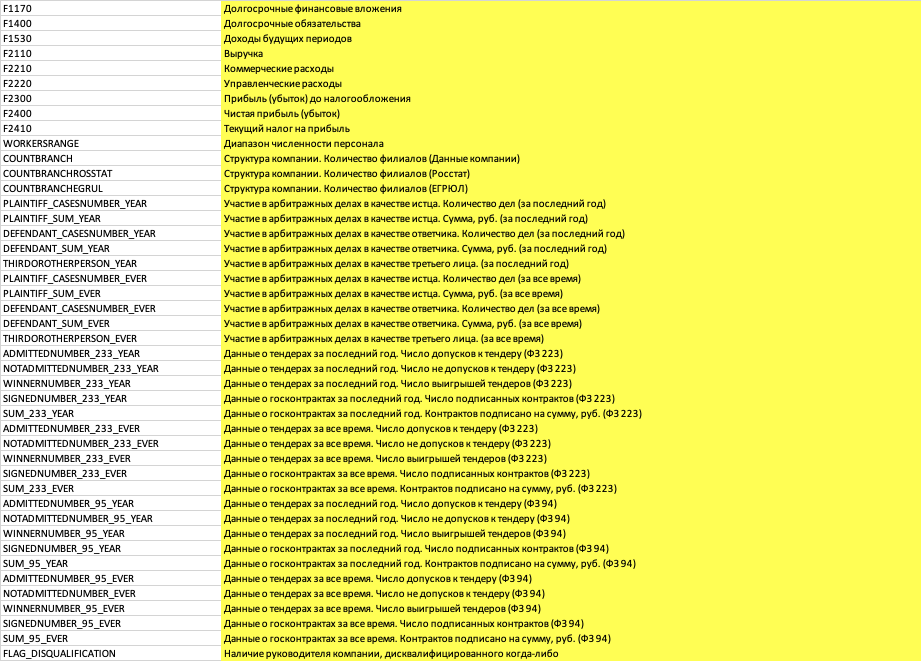

Далее можно сделать анализ выделенных экспертным путем признаков.
Общая цель: Спрогнозировать вероятность невыполнения контракта поставщиком 

**Банковская гарантия** — соглашение, по которому банк обязан выплатить долг клиента, если тот не выполнил своих обязательств. Выдача гарантий банком происходит после одобрения клиентской заявки.

**Задача** — построить аппликационную модель оценки вероятности предъявления по гарантии, чтобы минимизировать потери от кредитного риска. В качестве предикторов для моделирования используются анкетные данные клиента и его финансовые показатели.

**Решения оцениваются** по метрике ROC/AUC Score.

Решения оцениваются по метрике ROC/AUC Score (англ. Area Under Curve, площадь под кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. wikipedia.org, scikit-learn.org. ROC-кривая – графичеcкая характеристика качества бинарного классификаторa.


In [ ]:
df_test.head(150)

NameError: ignored